In [ ]:
#| echo: false
from data import *
from utils import *
from model import *

In [ ]:
#| echo: false
plt.style.use('dark_background')

In [ ]:
#| echo: false
#| output: false
train_df = get_mnist_df()
valid_df = get_mnist_df(train=False)
train_dl, valid_dl = get_dls(train_df, valid_df, bs=64)
dls = DataLoaders(train_dl, valid_dl)
dls = dls.to('cuda')
train_df.shape, valid_df.shape, len(train_dl), len(valid_dl)

((60000, 2), (10000, 2), 938, 79)

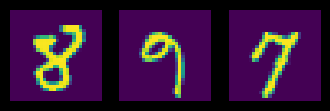

In [ ]:
plot_dataset(train_df)

In [ ]:
model = Autoencoder()
learner = Learner(dls, model, loss_func=MSELossFlat(), ).to_fp16()

In [ ]:
learner.model

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(28, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=2048, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=2048, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(128, 4, 4))
    (3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(64, 28, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): ReLU()
    (7): ConvTranspose2d(28, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
)

In [ ]:
learner.fine_tune(4, 3e-2)

epoch,train_loss,valid_loss,time
0,3295.651855,3163.105713,00:10


epoch,train_loss,valid_loss,time
0,3082.226074,3094.357910,00:09
1,2953.689941,2967.057373,00:09
2,2874.651855,2855.561523,00:09
3,2752.941895,2763.075928,00:08


### Lets take a quick look at a few reconstructed images

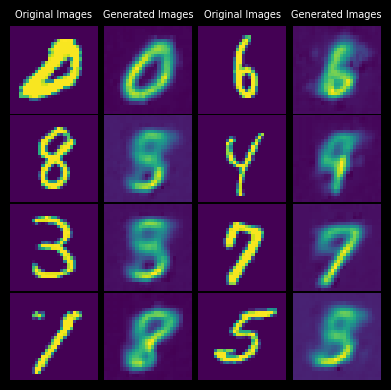

In [ ]:
plt_subs(*get_valid_results(learner.model, dls.train), size=2)

## Latent space exploration

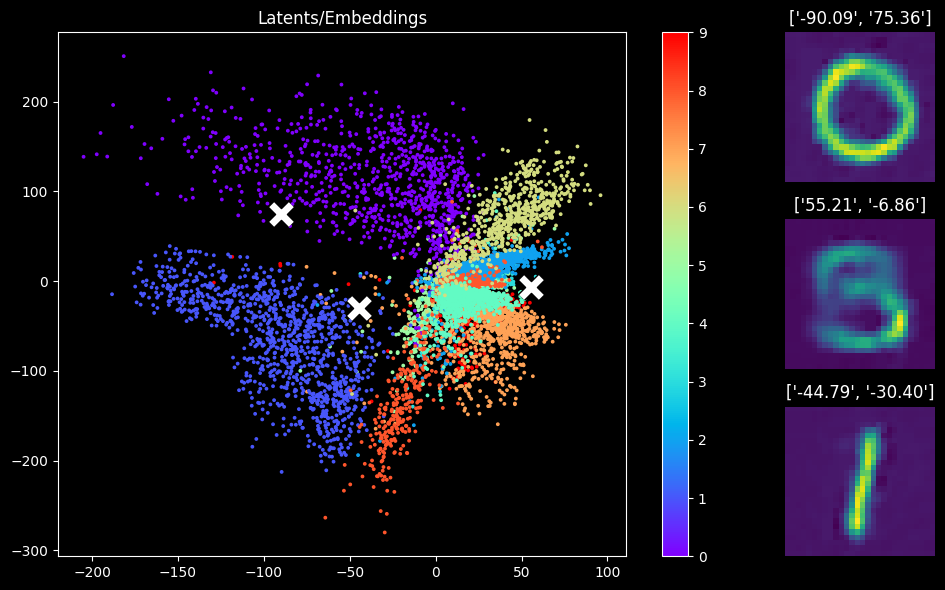

In [ ]:
#| fig-cap: "Figure 2: Validation Embedding Space and Three Latent Reconstructions"
#| fig-subcap:
#|   - "the model is able to map each number into it's own subspace -- some overlap considerably more than others"
plot_latent_regen(learner.model, min=-100, max=100)